In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Problem Statement

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

HERE WE HAVE TO PREDICT 1) Fuel_type      2) capacity_mw 

# NOW LOOKING AT DATA SET

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TOP FIVE ROWS DATA GIVES

In [3]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


BOTTOM FIVE ROWS DATA GIVES

In [4]:
data.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Data description:
    
1.country :- 3 character country code corresponding to the ISO 3166-1 alpha-3 specification.

2.country_long :- longer form of the country designation.

3.name :- name or title of the power plant, generally in Romanized form.

4.gppd_idnr :- 10 or 12 character identifier for the power plant.

5.capacity_mw :- electrical generating capacity in megawatts.

6.latitude :- geolocation in decimal degrees; WGS84 (EPSG:4326).

7.longitude :- geolocation in decimal degrees; WGS84 (EPSG:4326).

8.primary_fuel :- energy source used in primary electricity generation or export.

9.other_fuel1 :- energy source used in electricity generation or export.

10.other_fuel2 :- energy source used in electricity generation or export.

11.other_fuel3 :- energy source used in electricity generation or export.

12.commissioning_year :- year of plant operation, weighted by unit-capacity when data is available.

13.owner :- majority shareholder of the power plant, generally in Romanized form.

14.source :- entity reporting the data; could be an organization, report, or document, generally in Romanized form.

15.url :- web document corresponding to the source field.

16.geolocation_source :- attribution for geolocation information.

17.wepp_id :- a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

18.year_of_capacity_data :- year the capacity information was reported.

19.generation_gwh_2013 :- electricity generation in gigawatt-hours reported for the year 2013.

20.generation_gwh_2014 :- electricity generation in gigawatt-hours reported for the year 2014.

21.generation_gwh_2015 :- electricity generation in gigawatt-hours reported for the year 2015.

22.generation_gwh_2016 :- electricity generation in gigawatt-hours reported for the year 2016.

23.generation_gwh_2017 :- electricity generation in gigawatt-hours reported for the year 2017.

24.generation_data_source :- attribution for the reported generation information.

25.estimated_generation_gwh :- estimated annual electricity generation in gigawatt-hours.



In this particular problem i have two targets i have to find out predictions for Fuel type and capacity_mw.


a) If i consider Fuel type as target then i have to take classification models to predict.

b) If i consider capacity_mw as target then i have to take Regression models to predict.

In [5]:
# now let us consider fuel name as Fuel type as we have predict Fuel type as per problem
data.rename(columns={'primary_fuel':'Fuel_type'},inplace=True)

# EDA PART

In [6]:
data.shape #Shape of the data set

(908, 25)

here for above data set there are 908 Rows & 25  Columns are present

In [7]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'Fuel_type', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

these are different columns present at this data

In [8]:
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

from above data it has object cloumns are 12 & similarly float/Numerical columns are of 13 respectively.

# Now we find the full data information 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   Fuel_type                 908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

By this here we found that there are many null values present in data.

Now we have to find is there any Null values are present in the given data set or not for better understanding.

In [10]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
Fuel_type                     0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

Data has many columns with Null values present

we will find null values through heat map for better understanding

<AxesSubplot:>

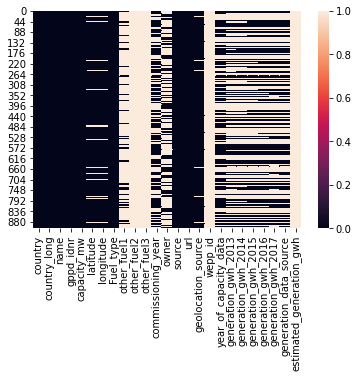

In [11]:
sns.heatmap(data.isnull())

So if we observe the cloumns 'latitude','longitude','other_fuel1','other_fuel2','other_fuel3','commissioning_year','owner','geolocation_source','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_data_source','estimated_generation_gwh' are having Null values in this data set.

I can clearly observe that there are some null values in some columns of the dataset.

other_fuel3, wepp_id and estimated_generation_gwh has all NaN values keeping all the values in a column as NaN has no meaning so i can drop these 3 columns.

other_fuel2 has only one non null value which means all other values are NaN so this column also has nothing to do with my data training. So i will drop this column also.


In [12]:
#Droping unnecessary columns
data = data.drop(["other_fuel3"],axis=1)
data = data.drop(["wepp_id"],axis=1)
data = data.drop(["estimated_generation_gwh"],axis=1)
data = data.drop(["other_fuel2"],axis=1)

In [13]:
data.nunique()

country                     1
country_long                1
name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  837
longitude                 828
Fuel_type                   8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2013       364
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
generation_data_source      1
dtype: int64

as the columns country,country_long,year_of_capacity_data,generation_data_source are having only single count so need to keep this columns just drop thiese all columns respectively.

In [14]:
#Droping unnecessary columns
data = data.drop(["country"],axis=1)
data = data.drop(["country_long"],axis=1)
data= data.drop(["year_of_capacity_data"],axis=1)
data = data.drop(["generation_data_source"],axis=1)

Now lets check the updated data set

In [15]:
data.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [16]:
data.shape

(908, 17)

So from above shape of data we sucessfuly removed the null values data. Now there are 908 Rows & 17 Cloumns

In [17]:
data['name'].unique() #checking for this columns having unique values

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [18]:
data['name'].value_counts() # similarly checking value_counts

Panandhro Solar Power Plant            1
KUTTIYADI Add ext                      1
MAITHON RB TPP                         1
Gorsar Wind Farm                       1
SHOLAYAR                               1
                                      ..
YELHANKA (DG)                          1
H_GANJ B                               1
Mandrup - Giriraj Solar Power Plant    1
RMC MANGROL                            1
Davangere Wind Farm                    1
Name: name, Length: 908, dtype: int64

In [19]:
data['gppd_idnr'].value_counts()

WRI1026196    1
IND0000317    1
WRI1026126    1
WRI1026794    1
WRI1019909    1
             ..
WRI1026140    1
IND0000371    1
WRI1026113    1
IND0000151    1
WRI1019941    1
Name: gppd_idnr, Length: 908, dtype: int64

In [20]:
data['url'].value_counts()

http://www.cea.nic.in/                                                                                                                                520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                                                                                         7
http://www.ntpc.co.in                                                                                                                                   6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf                                                                        5
http://www.acclimited.com/                                                                                                                              4
                                                                                                                                                     ... 
https://cdm.unfccc.int/filestorage/2/F/R/2FRTLO45MK87SJZUYCDN9GWHBAEP3X/7647

In [21]:
data['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Tata BP Solar India Limited                    1
P3 Green                                       1
Est vt Arind                                   1
National Ltd nfl)                              1
Powers Private                                 1
Name: source, Length: 191, dtype: int64

In [22]:
data['owner'].value_counts()

Jk Cement ltd                                                  4
Sterling Agro Industries ltd.                                  4
Acc Acc ltd                                                    4
Shri Ssk ltd                                                   3
Jaypee Ltd jccl)                                               3
                                                              ..
Gujurat Alkalies and Chemicals Limited                         1
Vivek Pharmachem (India) Limited                               1
Kesoram Industries ltd                                         1
Omega Solar Projects Private Limited                           1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Name: owner, Length: 280, dtype: int64

By checking all these 4 columns i.e 'Name','gppd_idnr','url','owner'. There all columns are unique ones. And also these columns are of no releation with predicted/Target column so it will not impact on the model to predict.
So i will drop/remove these columns.

In [23]:
data = data.drop(["name"],axis=1)
data = data.drop(["gppd_idnr"],axis=1)
data= data.drop(["url"],axis=1)
data= data.drop(["owner"],axis=1)

In [24]:
data.head()

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [25]:
data.shape

(908, 13)

Now again i will check how many Null values are removed.

In [26]:
data.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

Here still there are columns with null values present. So wil replace these null values through imputation technique.

In [27]:
data.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
Fuel_type               object
other_fuel1             object
commissioning_year     float64
source                  object
geolocation_source      object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

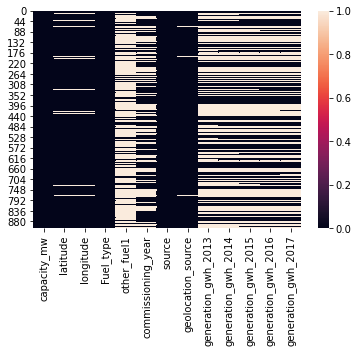

<Figure size 864x288 with 0 Axes>

In [28]:
#checking null values with heat map
sns.heatmap(data.isnull())
plt.figure(figsize=[12,4])
plt.show()

from above can clearly find latitude,longitutide,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 are having Null Values.

# Feature Engineering

Rather than commissioning_year  the present_power_plant_year will give better model. So am subtrating with this year i.e 2021

In [29]:
data['Present_Power_plant_year'] = 2021 - data['commissioning_year']

In [30]:
data.head()

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Present_Power_plant_year
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,10.0
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500,17.0
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,6.0


As there is present_Powerplant_year is updated so there is not need of commissioning_year. So lets drop it.

In [31]:
data.drop(columns=["commissioning_year"],inplace=True)

In [32]:
# Now lets check data set again
data.head()

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Present_Power_plant_year
0,2.5,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,10.0
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500,17.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,6.0


So its done.

So as i said that by imputation technique all Nan values should replace. For that i will check again how much Null values present in this data.

In [33]:
data.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
Fuel_type                     0
other_fuel1                 709
source                        0
geolocation_source           19
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
Present_Power_plant_year    380
dtype: int64

In [34]:
#Replacing NaN values in numerical columns

data["latitude"] = data["latitude"].fillna(data["latitude"].median())
data["longitude"] = data["longitude"].fillna(data["longitude"].median())
data["Present_Power_plant_year"] = data["Present_Power_plant_year"].fillna(data["Present_Power_plant_year"].median())
data["generation_gwh_2013"] = data["generation_gwh_2013"].fillna(data["generation_gwh_2013"].median())
data["generation_gwh_2014"] = data["generation_gwh_2014"].fillna(data["generation_gwh_2014"].median())
data["generation_gwh_2015"] = data["generation_gwh_2015"].fillna(data["generation_gwh_2015"].median())
data["generation_gwh_2016"] = data["generation_gwh_2016"].fillna(data["generation_gwh_2016"].median())
data["generation_gwh_2017"] = data["generation_gwh_2017"].fillna(data["generation_gwh_2017"].median())

In [35]:
#Replacing NaN values in categorical columns

data["other_fuel1"] = data["other_fuel1"].fillna(data["other_fuel1"].mode()[0])
data["geolocation_source"] = data["geolocation_source"].fillna(data["geolocation_source"].mode()[0])

In [36]:
# Now checking again Null values after this replacement.
data.isnull().sum()

capacity_mw                 0
latitude                    0
longitude                   0
Fuel_type                   0
other_fuel1                 0
source                      0
geolocation_source          0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
Present_Power_plant_year    0
dtype: int64

Sucessfuly removed Null values from all columns. 

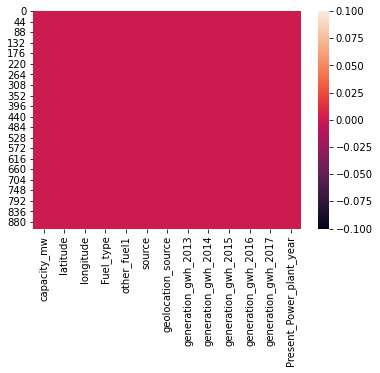

<Figure size 864x288 with 0 Axes>

In [37]:
# Now again checking with visulization Heat map
sns.heatmap(data.isnull())
plt.figure(figsize=[12,4])
plt.show()

In [38]:
# Now checking the skwennes of the data set.
data.skew()

capacity_mw                 3.193257
latitude                   -0.161811
longitude                   1.150963
generation_gwh_2013         5.535740
generation_gwh_2014         5.325540
generation_gwh_2015         5.565770
generation_gwh_2016         5.278233
generation_gwh_2017         5.312975
Present_Power_plant_year    1.650230
dtype: float64

Except in latitude column and all columns are having skewness in data.

<AxesSubplot:ylabel='Frequency'>

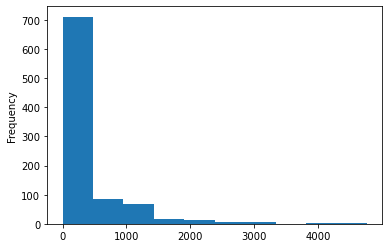

In [39]:
# skewness visulization for each column done by
data['capacity_mw'].plot.hist()

Here data is +/Right skwed

<AxesSubplot:ylabel='Frequency'>

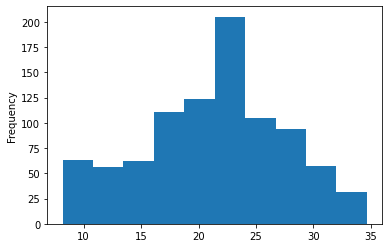

In [40]:
data['latitude'].plot.hist()

Here data is Normally Distributed.

<AxesSubplot:ylabel='Frequency'>

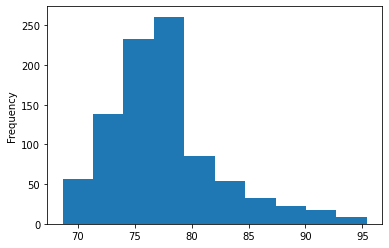

In [41]:
data['longitude'].plot.hist()

Here data is +/Right skwed

<AxesSubplot:ylabel='Frequency'>

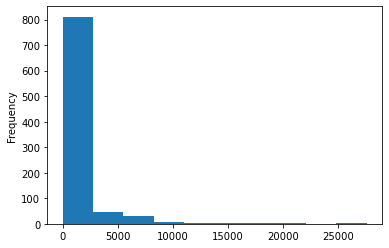

In [42]:
data['generation_gwh_2013'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

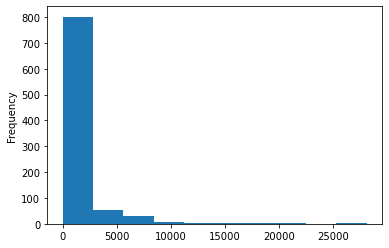

In [43]:
data['generation_gwh_2014'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

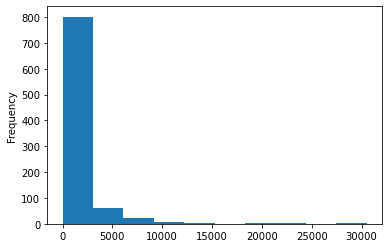

In [44]:
data['generation_gwh_2015'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

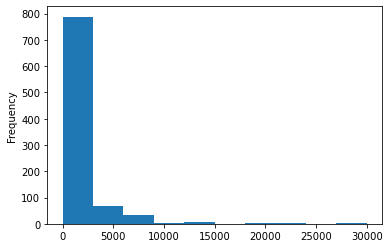

In [45]:
data['generation_gwh_2016'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

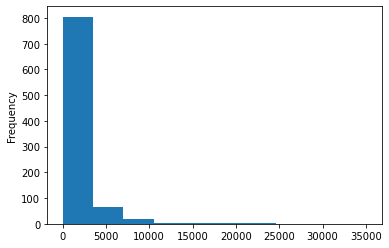

In [46]:
data['generation_gwh_2017'].plot.hist()

from generation_gwh_2013 to generation_gwh_2017 are all +/Right skewed data only.

<AxesSubplot:ylabel='Frequency'>

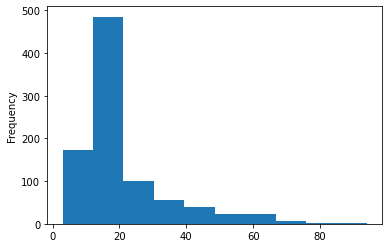

In [47]:
data['Present_Power_plant_year'].plot.hist()

present_power_plant_year is also +/Right skwed data only. 

In [48]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method

skew = ['capacity_mw','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Present_Power_plant_year']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [49]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,capacity_mw,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Present_Power_plant_year
0,-1.695723,-0.945660,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,-1.143845
1,0.192511,-0.534583,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,0.050961
2,-0.294920,-2.390876,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,0.050961
3,0.360587,2.181487,-0.234814,-0.246450,0.081323,0.097738,-0.175277,-0.315269
4,1.660257,1.132342,0.615682,1.151206,1.837256,1.845609,1.623273,-1.824023


In [50]:
data.skew()

capacity_mw                 0.020461
latitude                   -0.161811
longitude                   0.002567
generation_gwh_2013         0.313991
generation_gwh_2014         0.286606
generation_gwh_2015         0.220431
generation_gwh_2016         0.201832
generation_gwh_2017         0.194047
Present_Power_plant_year    0.023976
dtype: float64

By this we can confirmed that there is no skweness is present.

# AFTER SKWENESS REMOVED

# HISTOGRAM PLOT  

<AxesSubplot:ylabel='Frequency'>

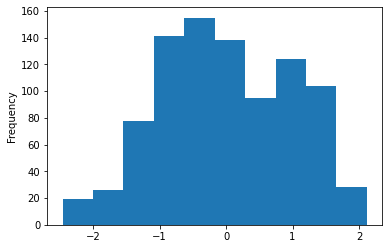

In [51]:
data['capacity_mw'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

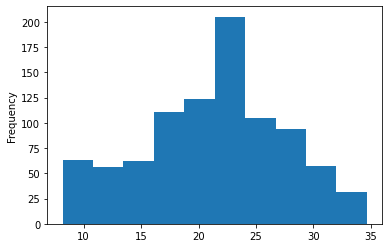

In [52]:
data['latitude'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

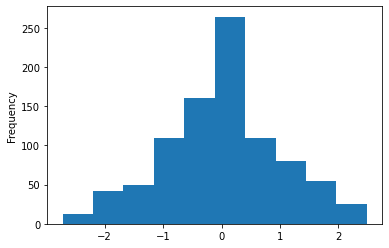

In [53]:
data['longitude'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

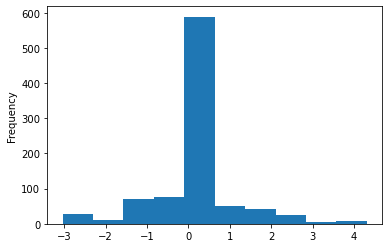

In [54]:
data['generation_gwh_2013'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

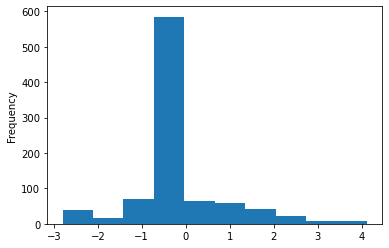

In [55]:
data['generation_gwh_2014'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

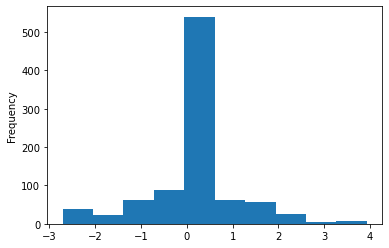

In [56]:
data['generation_gwh_2015'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

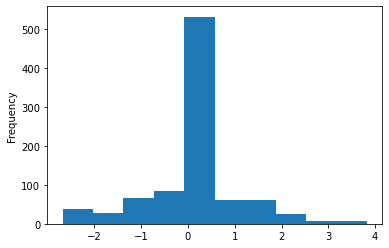

In [57]:
data['generation_gwh_2016'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

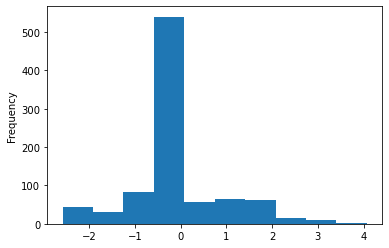

In [58]:
data['generation_gwh_2017'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

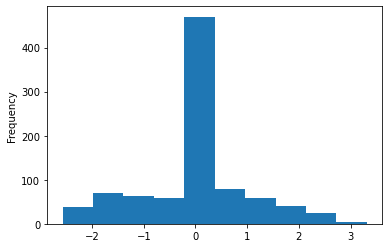

In [59]:
data['Present_Power_plant_year'].plot.hist()

These above Histogram shows that all are now normally distributed with bell curve shape.

# DISTRIBUTION PLOT 

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

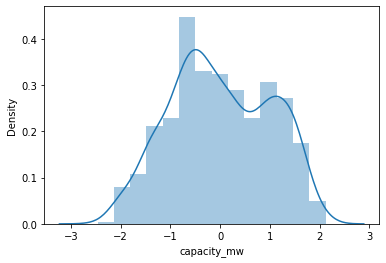

In [60]:
sns.distplot(data['capacity_mw'])

<AxesSubplot:xlabel='latitude', ylabel='Density'>

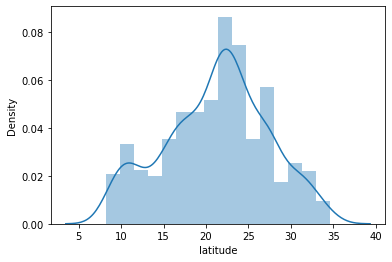

In [61]:
sns.distplot(data['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

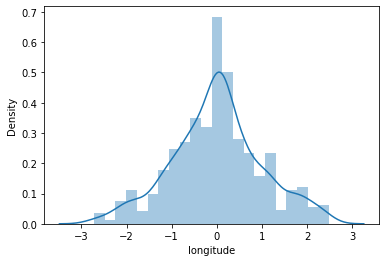

In [62]:
sns.distplot(data['longitude'])

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

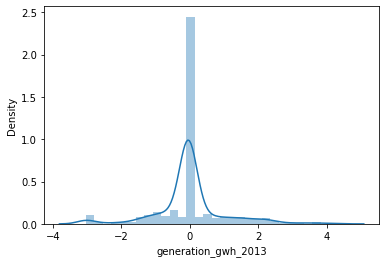

In [63]:
sns.distplot(data['generation_gwh_2013'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

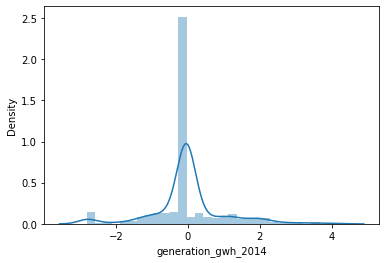

In [64]:
sns.distplot(data['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

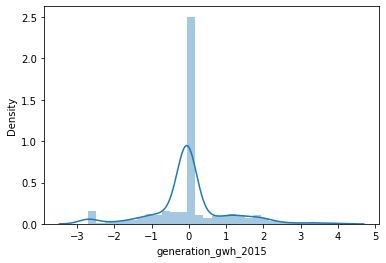

In [65]:
sns.distplot(data['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

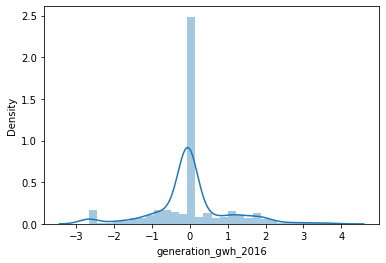

In [66]:
sns.distplot(data['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

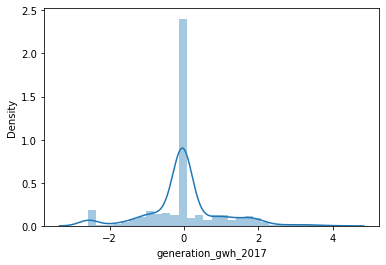

In [67]:
sns.distplot(data['generation_gwh_2017'])

<AxesSubplot:xlabel='Present_Power_plant_year', ylabel='Density'>

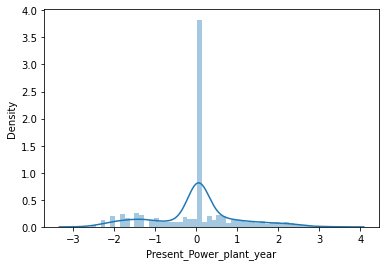

In [68]:
sns.distplot(data['Present_Power_plant_year'])

In [69]:
# Now using the Statical Measures for checking mean,median,50% Quartile , 75% Quartile, max,minfunction for the above data set.
data.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Present_Power_plant_year
count,9.080000e+02,908.000000,908.000000,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02
mean,1.540618e-17,21.225679,0.000001,-1.184350e-16,-3.302700e-16,8.866195e-17,-6.694351e-16,-2.698832e-16,2.493264e-16
std,1.000551e+00,6.089450,1.000551,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00
min,-2.462841e+00,8.168900,-2.719831,-3.040344e+00,-2.801534e+00,-2.710369e+00,-2.674396e+00,-2.585412e+00,-2.571587e+00
25%,-7.479067e-01,17.057825,-0.597316,-4.671209e-02,-4.548588e-02,-5.363672e-02,-5.498394e-02,-3.867305e-02,-2.182960e-01
50%,-6.745979e-02,21.778300,0.018127,-4.671209e-02,-4.548588e-02,-5.363672e-02,-5.498394e-02,-3.867305e-02,5.096106e-02
75%,9.037772e-01,25.183775,0.564832,-4.671209e-02,-4.548588e-02,-5.363672e-02,-5.498394e-02,-3.867305e-02,2.934703e-01
max,2.119435e+00,34.649000,2.485881,4.306772e+00,4.121080e+00,3.930232e+00,3.822979e+00,4.073100e+00,3.315672e+00


This data gives Statstical measures about the data set.

OBSERVATIONS:
    
1.From the data it is clear that there is no missing values present in data set.

2.But there is huge amount of outliers are present in capactiy_new (target) cloumn present.And remaining columns are having Outliers but its bit less comparing with Traget column.

3.There are no missing/Null data are present in this data set.

4.Comparing with other columns the latitude column has high Standard Devation(S.D) says that data spread widely.

So now lets visualize the outliers for each columns. before that seperate the categorical & Numerical coumns seperately.

# SEPERATING CATEROGICAL COLUMNS

In [70]:
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Fuel_type', 'other_fuel1', 'source', 'geolocation_source']


# SEPERATING NUMERICAL COLUMNS

In [71]:
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'Present_Power_plant_year']


# BOX PLOT FOR OUTLIERS

<AxesSubplot:>

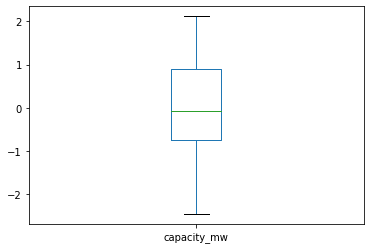

In [72]:
data['capacity_mw'].plot.box()

<AxesSubplot:>

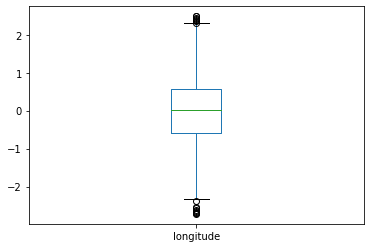

In [73]:
data['longitude'].plot.box()

<AxesSubplot:>

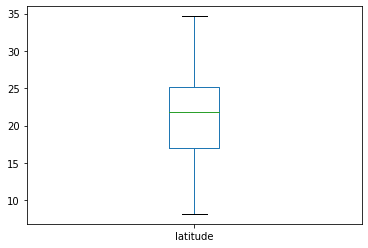

In [74]:
data['latitude'].plot.box()

<AxesSubplot:>

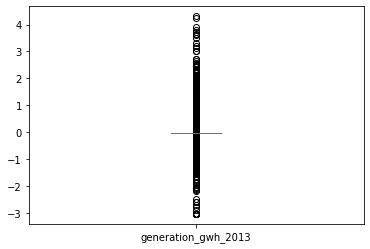

In [75]:
data['generation_gwh_2013'].plot.box()

<AxesSubplot:>

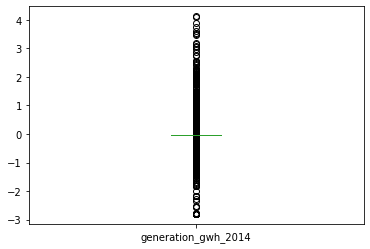

In [76]:
data['generation_gwh_2014'].plot.box()

<AxesSubplot:>

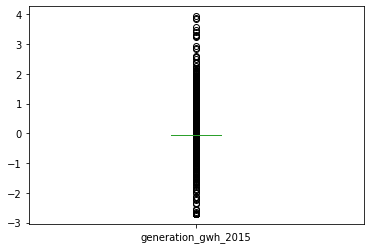

In [77]:
data['generation_gwh_2015'].plot.box()

<AxesSubplot:>

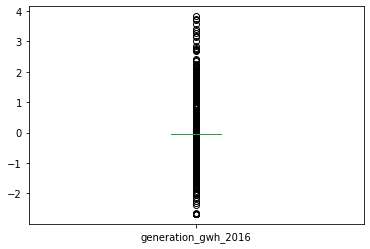

In [78]:
data['generation_gwh_2016'].plot.box()

<AxesSubplot:>

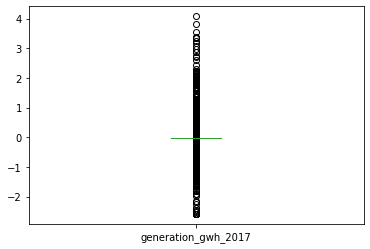

In [79]:
data['generation_gwh_2017'].plot.box()

<AxesSubplot:>

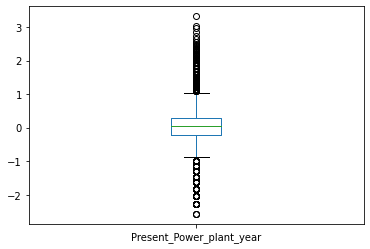

In [80]:
data['Present_Power_plant_year'].plot.box()

Above all are Outliers present expect at latitude & capacity_mw cloumn.

# REMOVAL OF OUTLIERS BY Z-SCORE

In [81]:
columns = data[['longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'Present_Power_plant_year']]

In [82]:
from scipy.stats import zscore

In [83]:
z=np.abs(zscore(columns))

In [84]:
z

array([[0.94566101, 0.04671209, 0.04548588, ..., 0.05498394, 0.03867305,
        1.14384466],
       [0.53458397, 0.04671209, 0.04548588, ..., 0.05498394, 0.03867305,
        0.05096106],
       [2.39087749, 0.04671209, 0.04548588, ..., 0.05498394, 0.03867305,
        0.05096106],
       ...,
       [0.2685914 , 0.04671209, 0.04548588, ..., 0.05498394, 0.03867305,
        0.05096106],
       [0.78805285, 0.04671209, 0.04548588, ..., 0.05498394, 0.03867305,
        0.05096106],
       [0.19542302, 0.04671209, 0.04548588, ..., 0.05498394, 0.03867305,
        0.05096106]])

Now outliers are remove.

In [85]:
data1=data[(z<3).all(axis=1)]
data1

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Present_Power_plant_year
0,-1.695723,28.1839,-0.945660,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,-1.143845
1,0.192511,24.7663,-0.534583,Coal,Oil,Ultratech Cement ltd,WRI,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,0.050961
2,-0.294920,21.9038,-2.390876,Wind,Oil,CDM,WRI,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,0.050961
3,0.360587,23.8712,2.181487,Gas,Oil,Central Electricity Authority,WRI,-0.234814,-0.246450,0.081323,0.097738,-0.175277,-0.315269
4,1.660257,21.9603,1.132342,Coal,Oil,Central Electricity Authority,WRI,0.615682,1.151206,1.837256,1.845609,1.623273,-1.824023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1.603578,16.2949,0.168021,Coal,Oil,Central Electricity Authority,WRI,-0.046712,-0.045486,-2.561939,-0.764834,0.010848,-2.039894
904,-1.615938,12.8932,0.347894,Solar,Oil,Karnataka Power Corporation Limited,Industry About,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,0.050961
905,-0.525593,15.2758,-0.268590,Wind,Oil,CDM,WRI,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,0.050961
906,0.085318,24.3500,-0.788052,Coal,Oil,Hindustan Zinc ltd,WRI,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,0.050961


In [86]:
data1.shape

(869, 13)

In [87]:
data.shape

(908, 13)

In [88]:
#checking how much data has been lossed
data_loss= (908-869)/908*100
data_loss

4.295154185022026

So data loss 4.2% of data by removing of outliers.

# Encoding the categorical columns using Label Encoding

In [89]:
categorical_col = ['Fuel_type', 'other_fuel1', 'source', 'geolocation_source']

In [90]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data1[categorical_col]= data1[categorical_col].apply(LE.fit_transform)

In [91]:
data1[categorical_col]

,Fuel_type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
903,1,2,22,2
904,6,2,77,0
905,7,2,21,2
906,1,2,59,2


Now we have encoded the categorical columns using label encoding method

# CHECKING CORRELATION 

In [92]:
data1.corr()

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Present_Power_plant_year
capacity_mw,1.000000,0.050811,0.326560,-0.523335,-0.039800,-0.390475,0.473651,0.369628,0.358084,0.346800,0.374825,0.348861,-0.264159
latitude,0.050811,1.000000,-0.045218,-0.008068,0.035085,0.058263,-0.187282,0.076695,0.107101,0.104929,0.132419,0.107988,-0.094910
longitude,0.326560,-0.045218,1.000000,-0.399964,0.015376,-0.247654,0.298503,0.027163,0.010302,0.012792,0.069433,0.047254,-0.111517
Fuel_type,-0.523335,-0.008068,-0.399964,1.000000,0.018399,0.042576,-0.481733,-0.168452,-0.157926,-0.160915,-0.181264,-0.159474,0.135736
other_fuel1,-0.039800,0.035085,0.015376,0.018399,1.000000,0.022912,-0.018413,-0.020853,-0.026924,0.006508,0.027172,0.028244,-0.015521
source,-0.390475,0.058263,-0.247654,0.042576,0.022912,1.000000,-0.501614,-0.043325,-0.032814,-0.026821,-0.028185,-0.014949,-0.009915
geolocation_source,0.473651,-0.187282,0.298503,-0.481733,-0.018413,-0.501614,1.000000,0.034817,0.026371,0.021554,0.022650,0.012014,-0.004798
generation_gwh_2013,0.369628,0.076695,0.027163,-0.168452,-0.020853,-0.043325,0.034817,1.000000,0.869258,0.755007,0.712953,0.647658,-0.076602
generation_gwh_2014,0.358084,0.107101,0.010302,-0.157926,-0.026924,-0.032814,0.026371,0.869258,1.000000,0.814102,0.761489,0.684697,-0.107175
generation_gwh_2015,0.346800,0.104929,0.012792,-0.160915,0.006508,-0.026821,0.021554,0.755007,0.814102,1.000000,0.878689,0.756313,-0.128037


# Checking correlation with heat map.

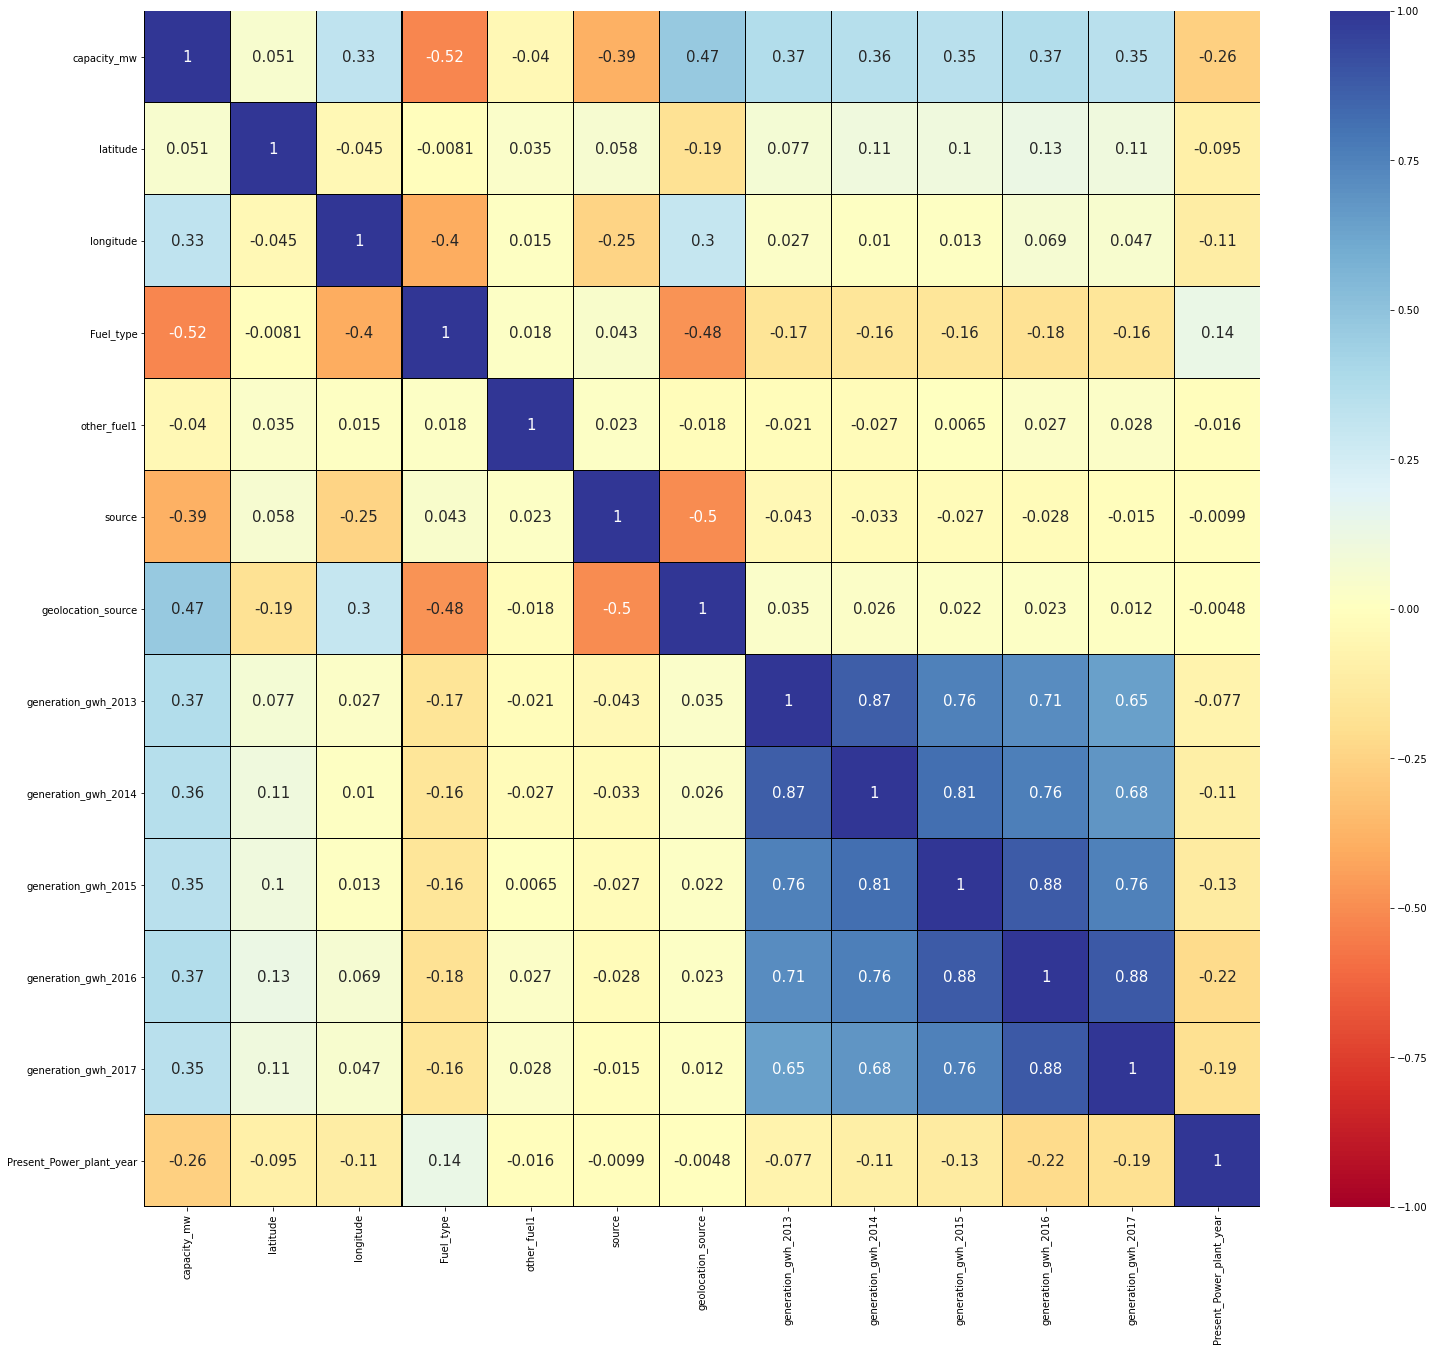

In [93]:
plt.figure(figsize=(25,22))
sns.heatmap(data1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="RdYlBu")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

# Correlation between capacity_mw and features

1.The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014, generation_gwh_2013.

2.And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age.

3.The columns other_fuel1 and latitude have no relation with the label, so we can drop them

# Correlation between Fuel_Type and features

1.The label Fuel_Type is less correlated with Power_plant_age and source.

2.The label is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years.

3.From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearity problem. So will try to solve this problem by Checking VIF value before building our models.


4.Also the features other_fuel1 and latitude have very very less correlation with both the labels. Let's drop those columns.


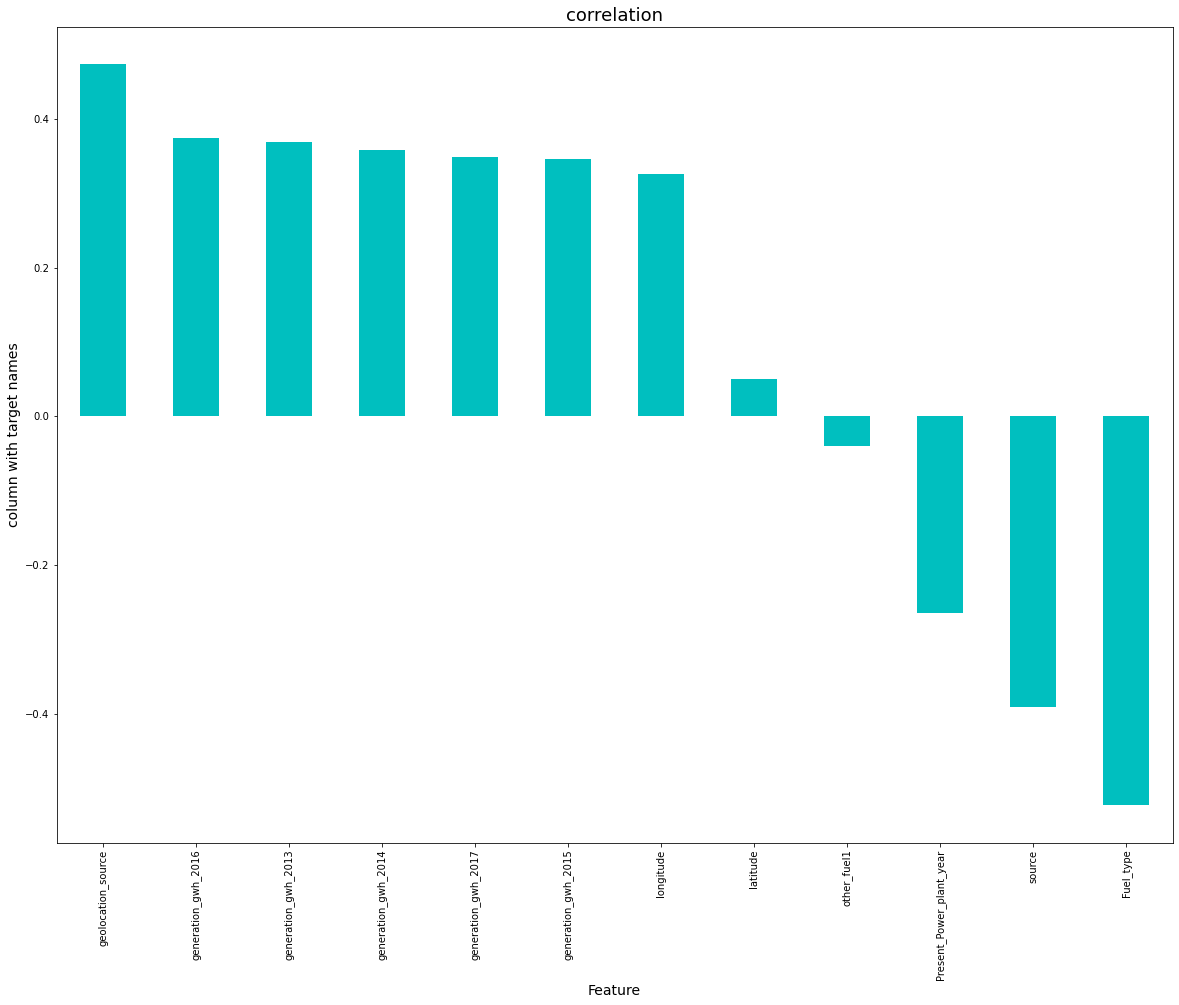

In [149]:
plt.figure(figsize=(20,15))
data1.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

other_fuel1 and latitude is very less correlated with capacity_mw so let me drop it.

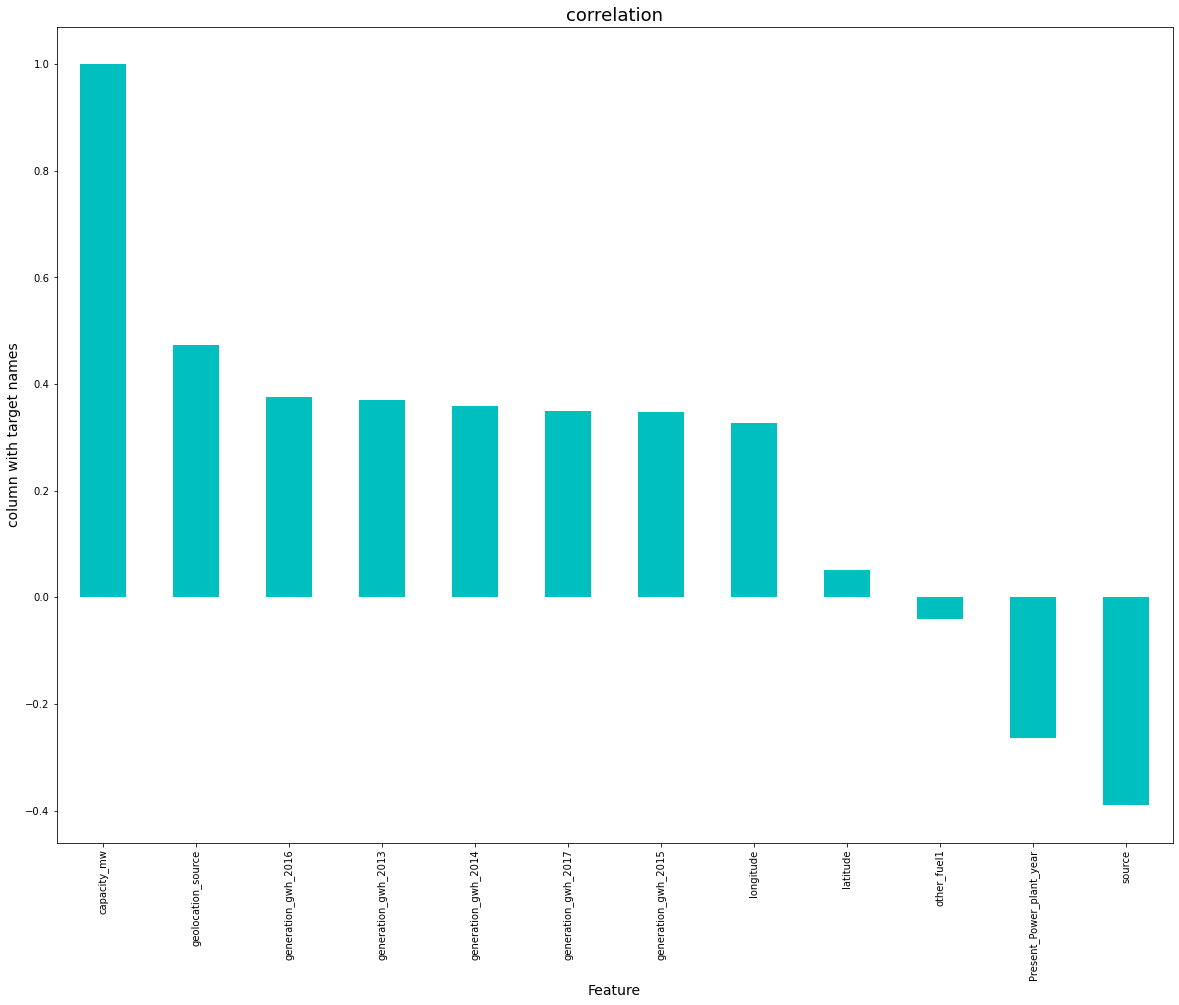

In [150]:
plt.figure(figsize=(20,15))
data1.corr()['capacity_mw'].sort_values(ascending=False).drop(['Fuel_type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

other_fuel1 and latitude is very less correlated with Fuel_type so let me drop it.

In [152]:
#Droping less correlated column
data1 = data1.drop(["other_fuel1"],axis=1)
data1 = data1.drop(["latitude"],axis=1)

# Feature Scaling using Standard Scalarization

In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data1 = pd.DataFrame(scaler.fit_transform(data1), columns=data1.columns)
data1

,capacity_mw,longitude,Fuel_type,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Present_Power_plant_year
0,-1.684285,-0.938531,1.191981,1.415781,-1.047102,-0.086150,-0.065251,-0.053333,-0.056045,-0.029726,-1.175900
1,0.243005,-0.524406,-0.984136,2.849277,0.404145,-0.086150,-0.065251,-0.053333,-0.056045,-0.029726,0.036563
2,-0.254508,-2.394462,1.627205,-0.524951,0.404145,-0.086150,-0.065251,-0.053333,-0.056045,-0.029726,0.036563
3,0.414557,2.211800,-0.548912,-0.502897,0.404145,-0.327703,-0.312589,0.104273,0.120564,-0.185635,-0.335080
4,1.741109,1.154877,-0.984136,-0.502897,0.404145,0.764470,1.407588,2.154857,2.141815,1.867088,-1.866131
...,...,...,...,...,...,...,...,...,...,...,...
864,1.683258,0.183407,-0.984136,-0.502897,0.404145,-0.086150,-0.065251,-2.982534,-0.876921,0.026792,-2.085192
865,-1.602850,0.364613,1.191981,0.710060,-2.498349,-0.086150,-0.065251,-0.053333,-0.056045,-0.029726,0.036563
866,-0.489952,-0.256442,1.627205,-0.524951,0.404145,-0.086150,-0.065251,-0.053333,-0.056045,-0.029726,0.036563
867,0.133595,-0.779754,-0.984136,0.313093,0.404145,-0.086150,-0.065251,-0.053333,-0.056045,-0.029726,0.036563



I have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns.

# Checking VIF(Variance Inflation Factor) values

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(data1.values,i)
              for i in range(len(data1.columns))]
vif["Features"] = data1.columns

vif

,VIF values,Features
0,2.168384,capacity_mw
1,1.301201,longitude
2,1.950357,Fuel_type
3,1.695541,source
4,1.935469,geolocation_source
5,4.318732,generation_gwh_2013
6,5.420516,generation_gwh_2014
7,5.846403,generation_gwh_2015
8,9.052215,generation_gwh_2016
9,4.693417,generation_gwh_2017


Here all column values having less than 10 means free from multicolinearity.

In [155]:
data1.head()

,capacity_mw,longitude,Fuel_type,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Present_Power_plant_year
0,-1.684285,-0.938531,1.191981,1.415781,-1.047102,-0.086150,-0.065251,-0.053333,-0.056045,-0.029726,-1.175900
1,0.243005,-0.524406,-0.984136,2.849277,0.404145,-0.086150,-0.065251,-0.053333,-0.056045,-0.029726,0.036563
2,-0.254508,-2.394462,1.627205,-0.524951,0.404145,-0.086150,-0.065251,-0.053333,-0.056045,-0.029726,0.036563
3,0.414557,2.211800,-0.548912,-0.502897,0.404145,-0.327703,-0.312589,0.104273,0.120564,-0.185635,-0.335080
4,1.741109,1.154877,-0.984136,-0.502897,0.404145,0.764470,1.407588,2.154857,2.141815,1.867088,-1.866131


Now data is cleaned/cleansing completed. Now proceed for model.

In [156]:
data1.shape

(869, 11)

# MACHINE LEARNING PART
a) FOR PREDICTION OF capacity_mw

In [157]:
x = data1.drop("capacity_mw",axis=1)
y = data1["capacity_mw"]

# Skweness checking

In [158]:
x.skew()

longitude                   0.031907
Fuel_type                   0.428812
source                      1.758892
geolocation_source         -2.087658
generation_gwh_2013         0.574102
generation_gwh_2014         0.141381
generation_gwh_2015        -0.099889
generation_gwh_2016        -0.071387
generation_gwh_2017        -0.128588
Present_Power_plant_year   -0.042046
dtype: float64

In [159]:
skew_fea=['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

In [160]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [161]:
x[skew_fea].skew()

longitude              0.031907
generation_gwh_2013    0.574102
generation_gwh_2014    0.141381
generation_gwh_2015   -0.099889
generation_gwh_2016   -0.071387
generation_gwh_2017   -0.128588
dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='Density'>

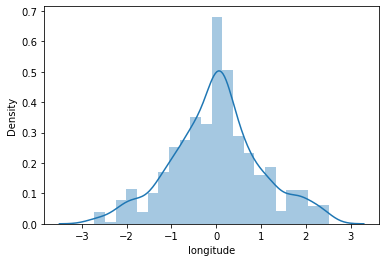

In [164]:
sns.distplot(x['longitude'])

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

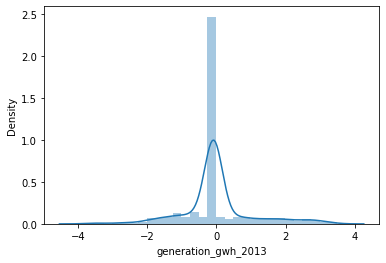

In [165]:
sns.distplot(x['generation_gwh_2013'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

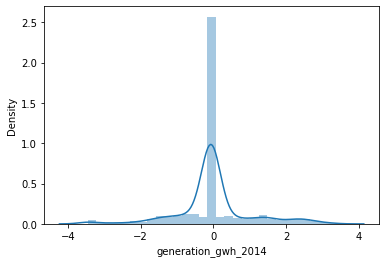

In [166]:
sns.distplot(x['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

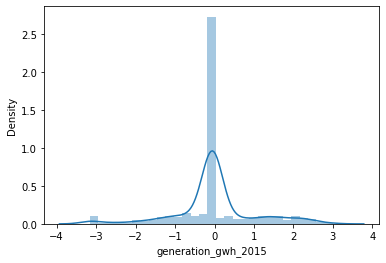

In [167]:
sns.distplot(x['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

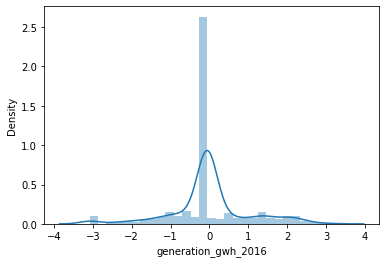

In [168]:
sns.distplot(x['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

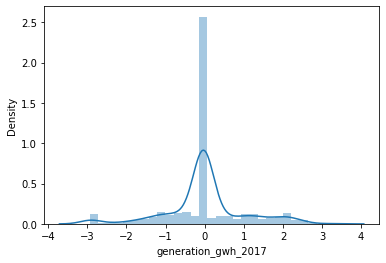

In [171]:
sns.distplot(x['generation_gwh_2017'])

So here skweness removed compeletly.

# Scaling the data using standard scaler

In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

# Using VIF to remove multicolinearity

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.296806,longitude
1,1.687367,Fuel_type
2,1.518789,source
3,1.893000,geolocation_source
4,4.268942,generation_gwh_2013
5,5.415737,generation_gwh_2014
6,5.845521,generation_gwh_2015
7,9.051502,generation_gwh_2016
8,4.675604,generation_gwh_2017
9,1.093084,Present_Power_plant_year


So all are below 10 so vif is no problem.

# Finding Best Random State and Accuracy

In [175]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [176]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8375614965995255  on Random_state  145


I got the best accuracy and random state.

In [177]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

# Regression Algorithms

In [180]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

i) DecisionTreeRegressor

In [181]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -0.8497524505092122
mean_squared_error: 1.7909598023432918
mean_absolute_error: 1.1192821124542705
root_mean_squared_error: 1.3382674629323137


r2_score for DecissionTreeRegressor is 84.9%

ii) RandomForestRegressor

In [182]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -0.1334421224780571
mean_squared_error: 1.0974167268069002
mean_absolute_error: 0.8650926548159975
root_mean_squared_error: 1.0475765971072952


r2_score for DecissionTreeRegressor is 13.33%

iii) Gradient Boosting

In [183]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -0.09508796736456393
mean_squared_error: 1.0602816225705487
mean_absolute_error: 0.8547337906197118
root_mean_squared_error: 1.0296997730263655


r2_score for GradientBoostingRegressor is 0.095%


iv) KNN:

In [184]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -0.15020684481839885
mean_squared_error: 1.1136485981585142
mean_absolute_error: 0.8551566083422081
root_mean_squared_error: 1.055295502766175


# Cross validation score

In [185]:
print(cross_val_score(DTR,X,y,cv=5).mean())

0.61209154222391


In [186]:
print(cross_val_score(RFR,X,y,cv=5).mean())

0.7703768978526896


In [187]:
print(cross_val_score(GBR,X,y,cv=5).mean())

0.7885723547936132


In [188]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.703760820617263


Above are the cross validation scores of DTR, RFR, GBR, KNN.


And the difference between model r2_score and cross validation score is less for RandomForestRegressor so RFR is my best model and i have to tune it using RFR parameters.

# Hyper parameter tuning

In [190]:
from sklearn.model_selection import GridSearchCV

In [191]:
parameter = {'criterion': ['mse','mae'],
            'n_estimators':[100,200,300,400],
            'max_depth': [5,6,7,8],
            'max_features':['auto','sqrt','log2'],
            'bootstrap': [True, False]}

In [194]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [197]:
Final_mod=RandomForestRegressor(bootstrap=True,criterion='mse',max_depth=8,max_features='log2',n_estimators=400,)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: -1.243502716592082
mean_squared_error: 0.9802557286188995
mean_absolute_error: 0.8229410693766855
RMSE value: 0.9900786476936565


# Saving the model

In [199]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Capacity.pkl")

['Capacity.pkl']

# ii) Prediction and model building for Fuel_type

Separating features and label

In [201]:
x_1 = data1.drop("Fuel_type",axis=1)
y_1 = data1["Fuel_type"]

Checking for skewness

In [203]:
x_1.skew()

capacity_mw                 0.018048
longitude                   0.031907
source                      1.758892
geolocation_source         -2.087658
generation_gwh_2013         0.574102
generation_gwh_2014         0.141381
generation_gwh_2015        -0.099889
generation_gwh_2016        -0.071387
generation_gwh_2017        -0.128588
Present_Power_plant_year   -0.042046
dtype: float64

# Scaling the data using standard scaler

In [205]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(x_1), columns=x_1.columns)

# Using VIF to remove multicolinearity

In [206]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x_1.values, i) for i in range(x_1.shape[1])]
vif["Features"]=X_1.columns
vif

,vif_Features,Features
0,1.875995,capacity_mw
1,1.186147,longitude
2,1.417283,source
3,1.600382,geolocation_source
4,4.318272,generation_gwh_2013
5,5.420067,generation_gwh_2014
6,5.844856,generation_gwh_2015
7,9.051870,generation_gwh_2016
8,4.692738,generation_gwh_2017
9,1.158449,Present_Power_plant_year


all are below valu 10 so vif is no issue.

# Balancing the target variable using oversampling

In [207]:
y_1.value_counts()

-0.113689    245
-0.984136    238
 1.191981    127
 1.627205    123
-0.548912     61
-1.419359     50
 0.756758     16
 0.321534      9
Name: Fuel_type, dtype: int64

# Finding Best Random State and Accuracy

In [210]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [211]:
from sklearn.tree  import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_1,y_1,test_size=.30, random_state =i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

ValueError: Unknown label type: 'continuous'

# Classification Algorithms

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score


i) DecisionTreeClassifier

In [213]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
preddt=DTC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

ValueError: Unknown label type: 'continuous'